<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, 'section');
        if (section) {
            section.setAttribute('data-background-image', src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(#2774AE,#ebf8e1, #FFD100);
  position: static;
}
</style>

<h1 style='color:white'> Statistics 21 <br/> Python & Other Technologies for Data Science </h1>

<h3 style='color:white'>Vivian Lew, PhD - Wednesday, Week 8</h3>

<script>
    setBackgroundImage('Window1.jpg');
</script>

# Loose ends
## Week 8 Wednesday

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
%matplotlib inline

## Decision Trees

- a machine learning algorithm that can be used for both regression and classification problems. 
- A tree-like model of decisions where each decision point (internal node) is a "test" on an attribute  
- each branch represents the outcome of the "test" 
- each end point ("leaf node") represents a class label (a decision taken after computing all attributes)
- The paths from root to leaf are understood as classification rules.

A decision tree is easy to understand and visualize and can be used with both numerical and categorical data together. A collection (ensemble) of decision trees in machine learning is known as a 'random forest'.

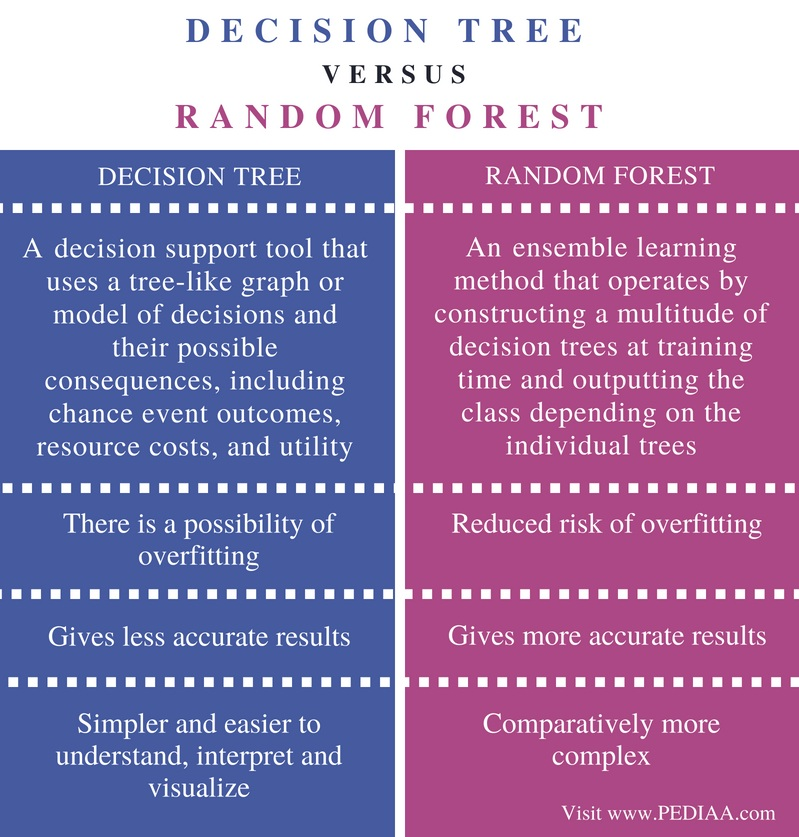

source: https://www.madlabai.com/decision-tree-vs-random-forests-4/

## Decision Tree Example

Looking at the breast cancer data again.  Always deal with the missing data.  
For our example, I'm going to drop it.

In [2]:
my_data = pd.read_csv("breast-cancer-wisconsin.data", 
                      header=None, index_col=0)
my_data = my_data.apply(pd.to_numeric, errors='coerce').dropna()
my_data.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


### Data Description

For your team final project, make it easier by having some kind of 
data description (a codebook) so you can decipher the data.

1 Clump Thickness               1 - 10  
2 Uniformity of Cell Size       1 - 10  
3 Uniformity of Cell Shape      1 - 10  
4 Marginal Adhesion             1 - 10  
5 Single Epithelial Cell Size   1 - 10  
6 Bare Nuclei                   1 - 10  
7 Bland Chromatin               1 - 10  
8 Normal Nucleoli               1 - 10  
9 Mitoses                       1 - 10  
10 Class:                        (2 for benign, 4 for malignant)


### Data Prep

In [3]:
# create X and y - being turned into numpy arrays, to_numpy is from pandas
y = np.array(my_data[10])
X = my_data.drop(axis = 1, columns = 10).to_numpy()

In [4]:
# Then split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1)  # train_test_split from sklearn

### Splitting the data (previous lecture)

It's an ML tactic - treating one data set as more than one dataset helps to:

- prevent models from overfitting the data
- evaluate generalizability
- allows comparability

Sometimes data is split 70/30, 75/25, 50/25/25 and much more.

## Decision Tree to Random Forest

- A decision tree is analgorithm that handles both regression and classification problems. 

- Each internal node (split) of the "tree" is a "test" (decision) on an attribute 

- Each branch represents the outcome of the "test" (decision)

- Each leaf represents the decision taken after computing all attributes

A Decision Tree is easy to understand and easy to visualize.

A Random Forest is a collection of Decision Trees. RF combines the predictions of multiple  decision trees to create more accurate and generalizable predictions.

In [5]:
# create a Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Visualize the decision tree
fig = plt.figure(figsize=(20,16))
#
#tree.plot_tree(clf)

#fig.savefig("decistion_tree10_8.png")


<Figure size 2000x1600 with 0 Axes>

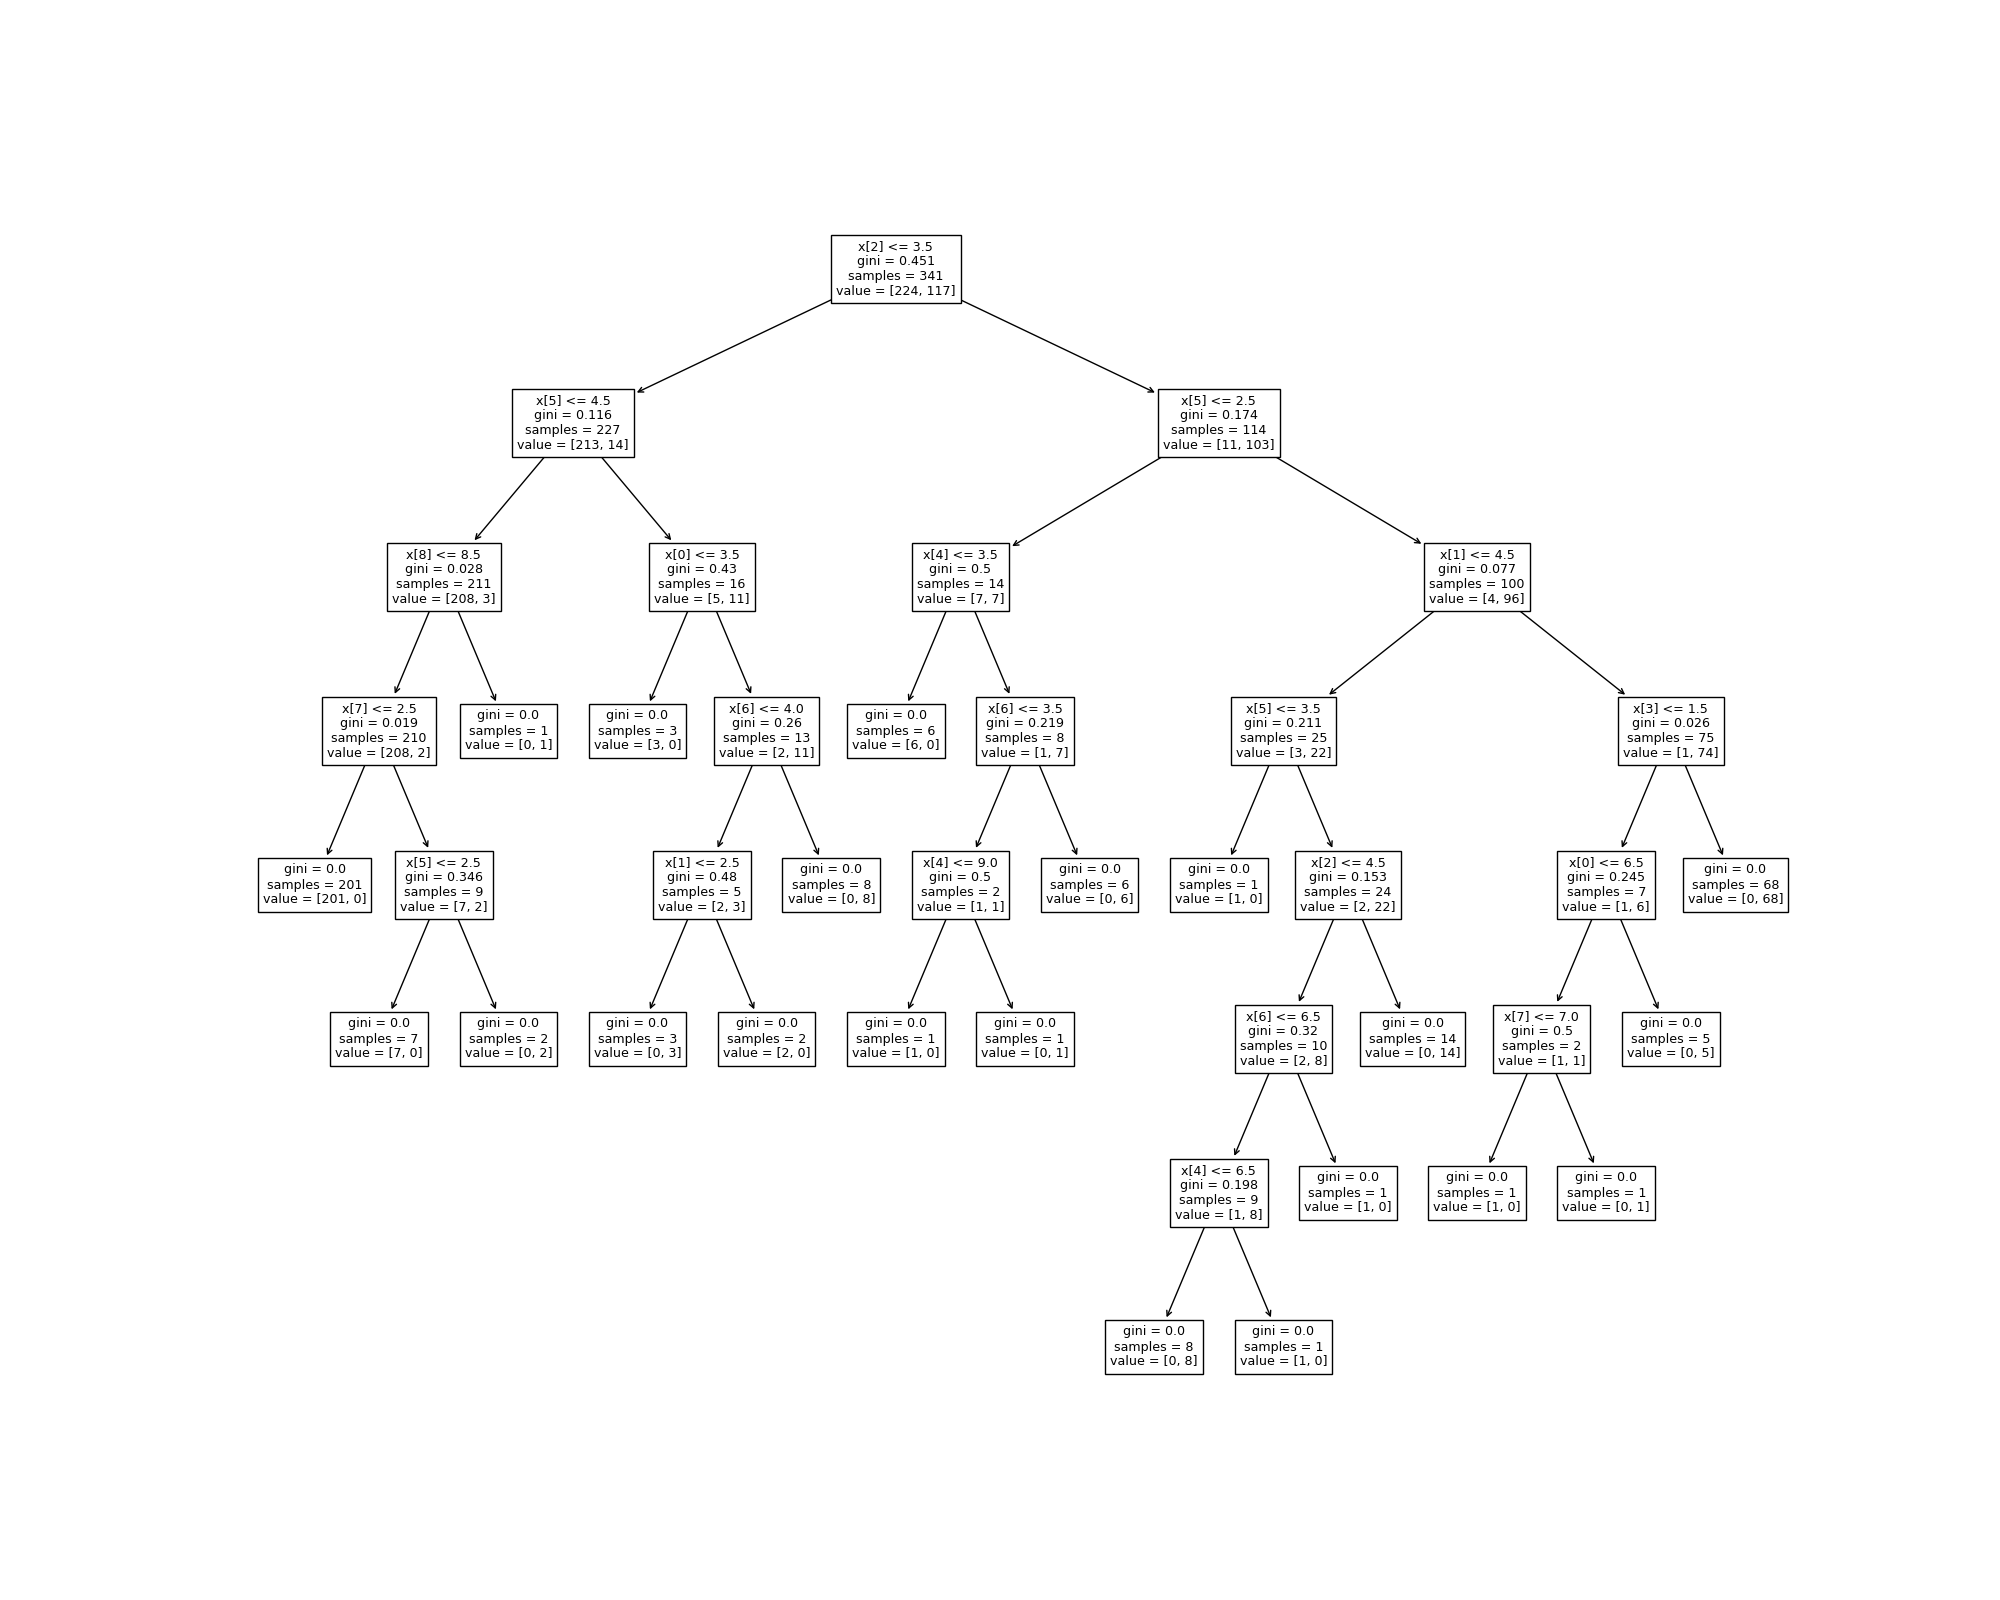

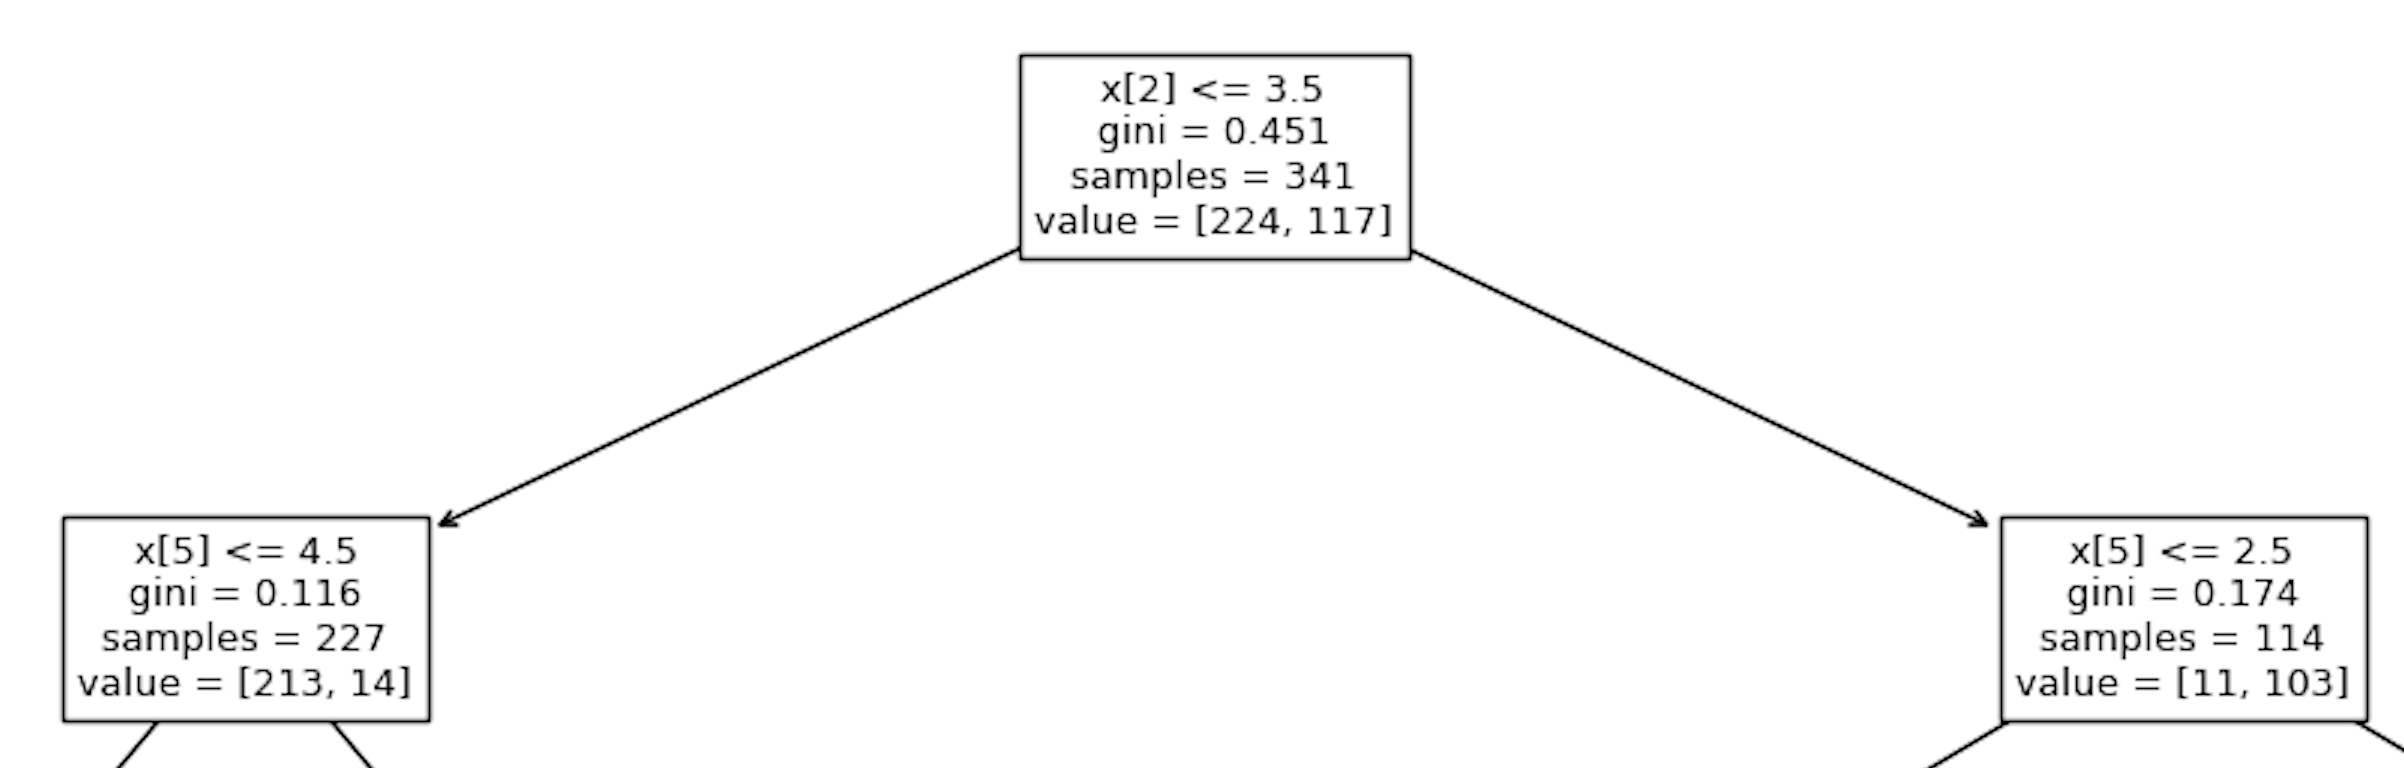

Gini is the probability that a randomly chosen sample (observation) in a node would be incorrectly labeled if it were to be labeled by the distribution of samples (observations) in that node. 

The decision tree algorithm chooses the node splits that minimize the Gini score of the child nodes. A lower Gini implies a better split because homogenity within a node is the goal (100% correctly classified).

## Random Forest

This is a popular machine method.  It is an "ensemble" of decision trees.  It builds multiple decision trees and averages the results.  The principle rests on the idea that a single model might be not be very powerful or accurate BUT that it provides some information and is better than just guess.

Ensemble methods combine the predictions of many "weak" models (weak learners) to create a strong learner - a powerful and accurate model.  Random forest relies upon aggregation and/or averaging  to arrive at a final "best" model.

In [6]:
# Recreate a y and a matrix of X's from the breast cancer data
y = np.array(my_data[10])
X = my_data.drop(axis = 1, columns = 10).to_numpy()

In [7]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1) 

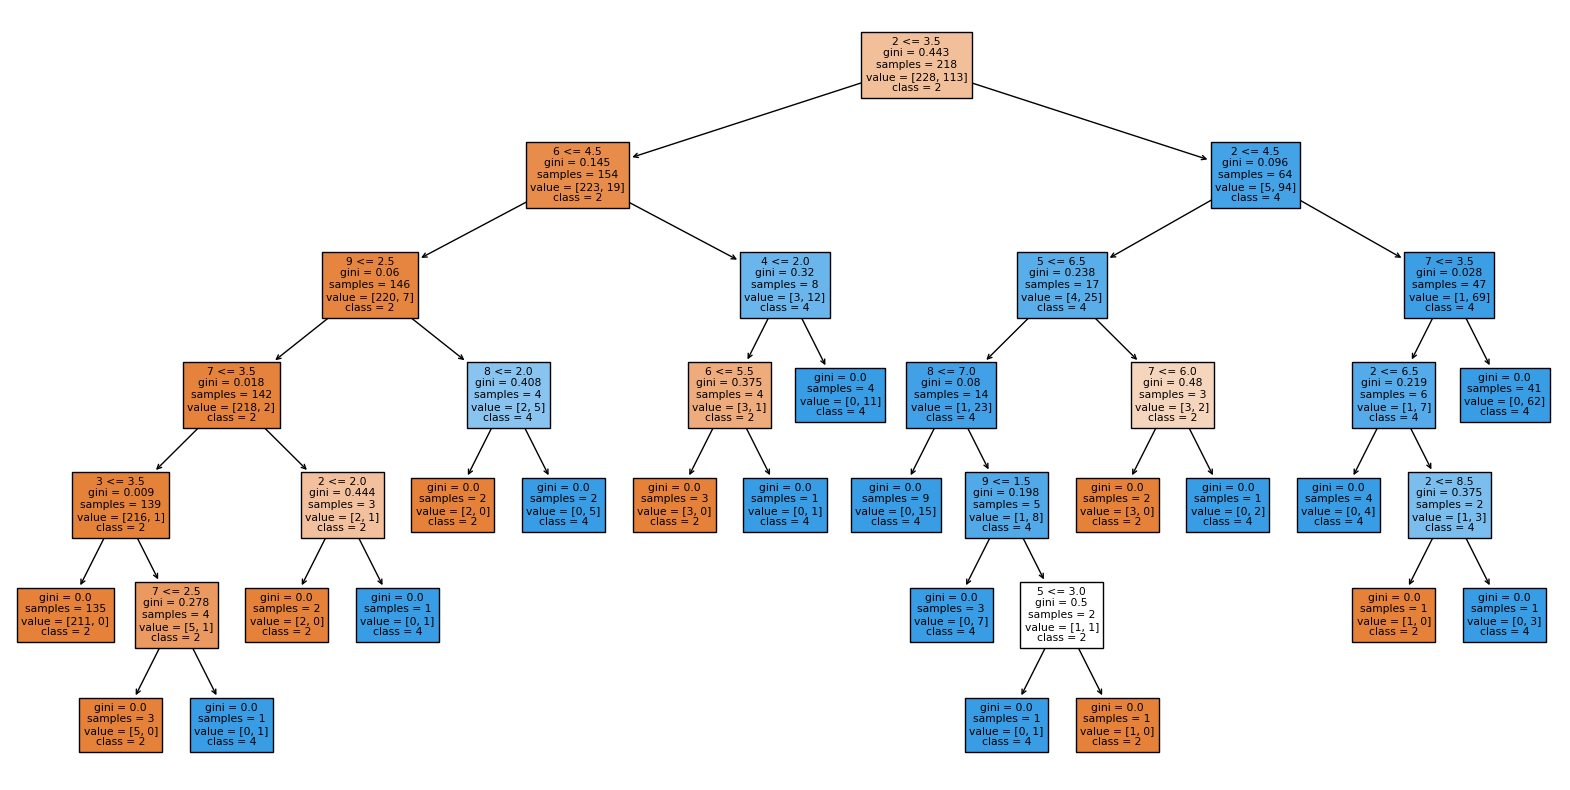

In [8]:
# Create Random Forest classifier object
rfc = RandomForestClassifier(
    n_estimators=10, random_state=1) # build 10 trees

# Train Random Forest Classifier
rfc = rfc.fit(X_train,y_train)

# Visualize one tree for our example
tree_to_visualize = rfc.estimators_[2]

# Plot it
plt.figure(figsize=(20,10))
tree.plot_tree(tree_to_visualize, filled=True, 
               feature_names=range(1,10), class_names=['2','4'])
plt.show()

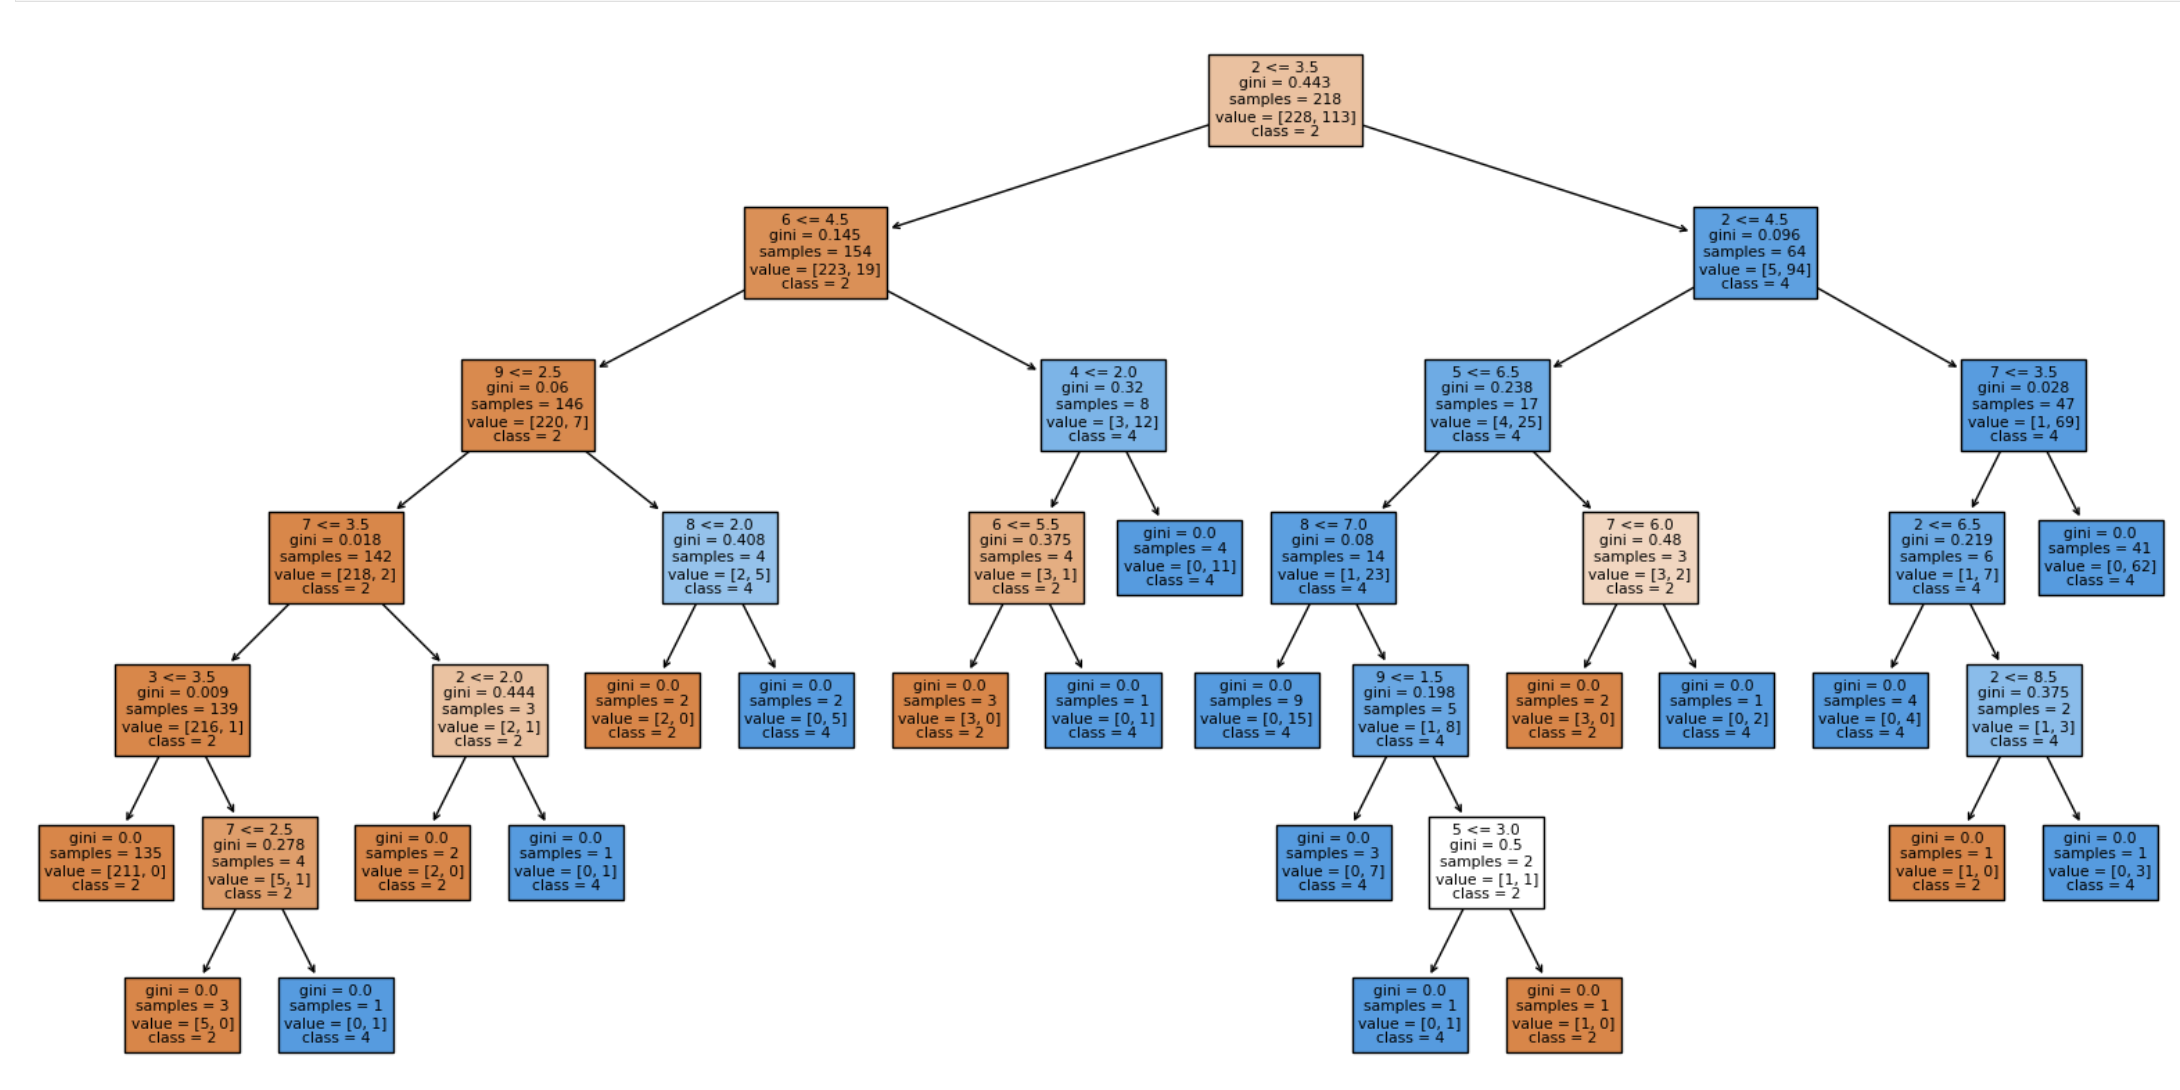

## Feature Importance

A next step might be examining feature importance 

It can give us insight into which features in the dataset were most important in making predictions

In [9]:
feature_names=range(1,10)
feature_importances = rfc.feature_importances_
print(feature_importances)

[0.02958005 0.18673432 0.19102007 0.02705263 0.1415895  0.28969154
 0.10104172 0.01916749 0.01412268]


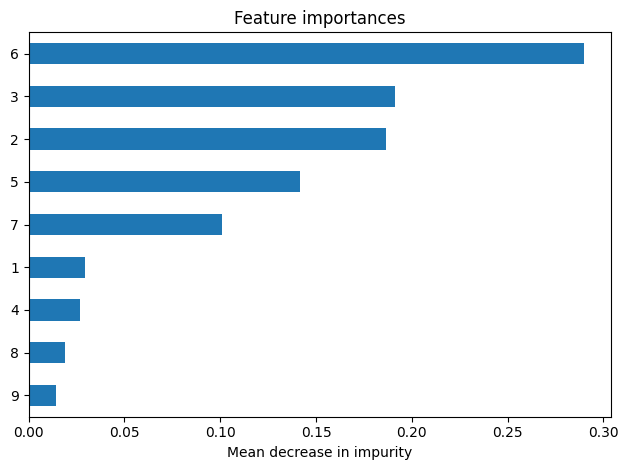

In [10]:
forest_importances = pd.Series(feature_importances, index=feature_names).sort_values()

fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

## Prediction

We return to the set aside test set and use it to generate predictions

In [11]:
y_pred_test = rfc.predict(X_test)
y_pred_test[0:15]

array([2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2])

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[214,   6],
       [  4, 118]])

```
class_names=['2','4'] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cnf_matrix), 
            annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['2','4'], yticklabels=['2','4']) 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 

plt.title('Confusion matrix', y=1.05) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');
```

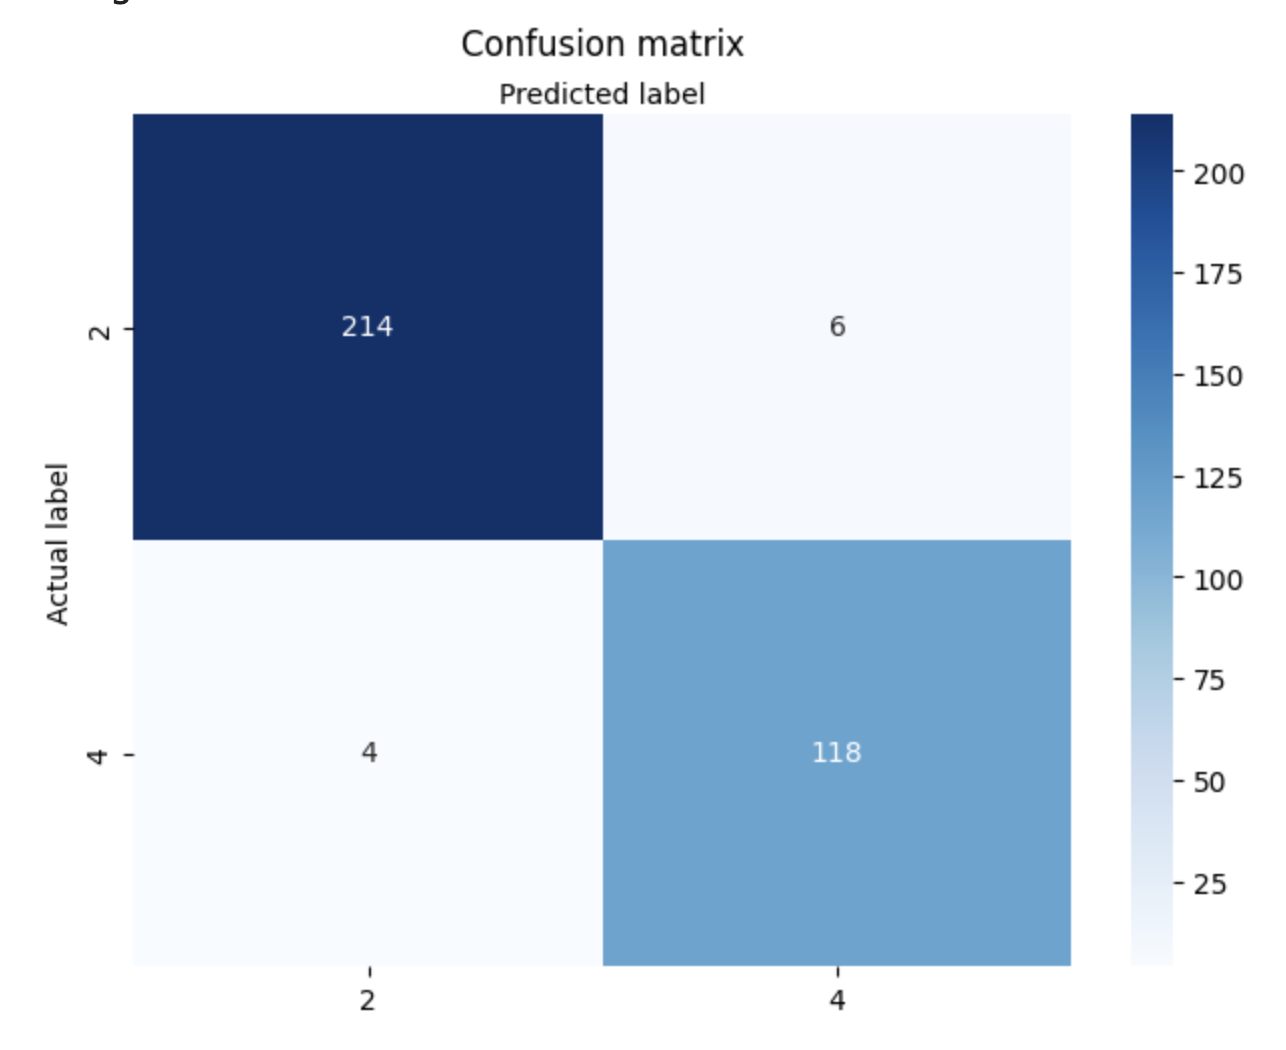

## List comprehensions (again)

List comprehensions allow us to create new lists concisely based on an existing collection

They take the form:

`[expr for val in collection if condition]`

This is basically equivalent to the following loop:

```
result = []
for val in collection:
    if condition:
        result.append(expr)
```

In [13]:
# make a list of the squares 
[x ** 2 for x in range(1, 11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [14]:
import numpy as np
np.array([x**2 for x in range(1, 11)])

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [15]:
# square only the odd numbers
[x**2 for x in range(1, 11) if x % 2 == 1]

[1, 9, 25, 49, 81]

In [16]:
# take a list of strings, and write the words that are over 2 characters long in uppercase.
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

You can create a list comprehension from any iterable (list, tuple, string, etc)

In [17]:
# extract the digits from a string
string = "Hello 963257 World"
[int(x) for x in string if x.isdigit()]
# for x in string, will look at each character individually
# if x is a digit, then convert it using int()

[9, 6, 3, 2, 5, 7]

In [18]:
# iterate over a dictionary's items
d = {'a':'apple', 'b':'banana', 'c':'carrots', 'd':'donut', 'e':'eggs'}

In [19]:
list(d.items())  # recall what dict.items() returns: a list of tuples

[('a', 'apple'),
 ('b', 'banana'),
 ('c', 'carrots'),
 ('d', 'donut'),
 ('e', 'eggs')]

In [20]:
['%s is for %s' % (key, value) for key, value in d.items() if key not in ('b', 'd') ]

['a is for apple', 'c is for carrots', 'e is for eggs']

## Dictionary Comprehensions

A dict comprehension looks like this:

`dict_comp = {key-expr : value-expr for value in collection if condition}`

In [21]:
# create a dictionary, where the key is the word capitalized, and the value is the length of the word
fruits = ['apple', 'mango', 'banana', 'cherry']
{f.capitalize():len(f) for f in fruits}

{'Apple': 5, 'Mango': 5, 'Banana': 6, 'Cherry': 6}

In [22]:
# create a dictionary where the key is the index, 
# and the value is the string in the strings list.
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']

In [23]:
list(enumerate(strings))  # enumerate produces a collection of tuples, with index and value

[(0, 'a'), (1, 'as'), (2, 'bat'), (3, 'car'), (4, 'dove'), (5, 'python')]

In [24]:
index_map = {index:val for index, val in enumerate(strings)}
index_map

{0: 'a', 1: 'as', 2: 'bat', 3: 'car', 4: 'dove', 5: 'python'}

In [25]:
index_map[0]

'a'

In [26]:
# note that enumerate returns tuples in the order (index, val)
# in the creation of a dictionary, you can swap those positions
# and even apply functions to them

# We create a dictionary where the key is the string, and the value is the index in the strings list.
loc_mapping = {val : index for index, val in enumerate(strings)}
loc_mapping

{'a': 0, 'as': 1, 'bat': 2, 'car': 3, 'dove': 4, 'python': 5}

In [27]:
loc_mapping['a']

0

In [28]:
# combine dictionaries with kwargs 
dd = {**loc_mapping, **index_map}
print(dd)

{'a': 0, 'as': 1, 'bat': 2, 'car': 3, 'dove': 4, 'python': 5, 0: 'a', 1: 'as', 2: 'bat', 3: 'car', 4: 'dove', 5: 'python'}


In [29]:
# even better... use dict.update(). This modifies the dictionary in place
loc_mapping.update(index_map)
loc_mapping

{'a': 0,
 'as': 1,
 'bat': 2,
 'car': 3,
 'dove': 4,
 'python': 5,
 0: 'a',
 1: 'as',
 2: 'bat',
 3: 'car',
 4: 'dove',
 5: 'python'}

## Filtering a dictionary

In [30]:
filtered_dict = {k: v for k, v in loc_mapping.items() 
                 if v == 'python' or k == 'python'}
filtered_dict

{'python': 5, 5: 'python'}

## Creating dictionaries from two lists

In [31]:
list_1 = ["AL", "AK", "AR", "AZ", "CA"]
list_2 = [1819, 1959, 1836, 1912, 1850]
state_admission = {k: v for k, v in zip(list_1, list_2)}
state_admission

{'AL': 1819, 'AK': 1959, 'AR': 1836, 'AZ': 1912, 'CA': 1850}

## Applying a function over a dictionary

The typical use for dictionary comprehension, shown last

In [32]:
state_age = {k: 2023 - v for k, v in state_admission.items()}
state_age

{'AL': 204, 'AK': 64, 'AR': 187, 'AZ': 111, 'CA': 173}

## Generator Expressions

Generator Expressions are similar to List comprehensions.

You create them with parentheses instead of square brackets.

The result is a generator object. You can access values in the generator using `next()`

In [33]:
g = (n**2 for n in range(12))

In [34]:
g

<generator object <genexpr> at 0x14c8b7610>

In [35]:
next(g)

0

In [36]:
next(g)

1

In [37]:
next(g)

4

In [38]:
next(g)

9

In [39]:
for val in g:
    print(val)

16
25
36
49
64
81
100
121


In [40]:
next(g) # calling next after it has run out of iterations will result in an error

StopIteration: 

## List Comprehension vs Generator Expressions in Python

A Key difference between a list comprehension and a generator is that the generator is lazy.

The list comprehension will evaluate the entire sequence of iterations. The generator will only generate the next value when it is asked to do so.

Depending on the expression that needs to be evaluated, you may prefer to use a generator over the list comprehension.

The following examples are from: https://code-maven.com/list-comprehension-vs-generator-expression

In [41]:
l = [n*2 for n in range(100000)] # List comprehension
g = (n*2 for n in range(100000))  # Generator expression

In [42]:
print(type(l))  # 'list'
print(type(g))  # 'generator'

<class 'list'>
<class 'generator'>


In [43]:
import sys
print(sys.getsizeof(l))  # more space in memory
print(sys.getsizeof(g))  # less space in memory

800984
104


In [44]:
# cannot access values in a generator by index
print(l[4])   # 8
print(g[4])   # TypeError: 'generator' object is not subscriptable

8


TypeError: 'generator' object is not subscriptable

In [45]:
g

<generator object <genexpr> at 0x14c8b77d0>

In [46]:
import time

t1 = time.time()
sum(g) # sum demands that all elements of g be calculated so the generator evaluates all of them
gt = time.time() - t1
print(gt)

0.005920886993408203


In [47]:
t2 = time.time()
sum(l) # the list already has the values in memory ready to be summed
lt = time.time() - t2
print(lt)

0.0005788803100585938


In [48]:
print(f"list is {round(gt/lt, 1)}x faster!")

list is 10.2x faster!


## map and lambda functions

The `map(function, iterable)` function takes a given  function and maps it to each element of an iterable. Map returns a map object which itself is iterable. The iterable can be converted it into a list or any other data structure that can hold multiple items, or iterate over it with a loop.

A lambda function allows you to create and use a new short function without having to formally define it. Lambda functions are also known as anonymous functions (no name). A lambda function can take any number of arguments, but can only have one expression. 

These two are frequently seen together

In [49]:
# the module re is used for regular expressions
import re

In [50]:
# re.sub substitutes one pattern of text with another.
# Here we define a function that replaces
# multiple instances of white space (\s+) with one space:
def replace_space(x):
    return(re.sub('\s+', ' ', x))

In [51]:
replace_space('Hello     Alabama ')

'Hello Alabama '

In [52]:
text = ['Hello     Alabama', 
        'Georgia!',
        'Georgia          ',
        'georgia', 
        'FlOrIda',
        'south  carolina##',
        'West virginia?']

In [53]:
map(replace_space, text) # an iterable

In [54]:
# we can use the map function to map the replace_space() 
# function to each element of the list text
for item in map(replace_space, text):
    print(item)

Hello Alabama
Georgia!
Georgia 
georgia
FlOrIda
south carolina##
West virginia?


In [55]:
# we can also put the map results inside a list
list(map(replace_space, text))

['Hello Alabama',
 'Georgia!',
 'Georgia ',
 'georgia',
 'FlOrIda',
 'south carolina##',
 'West virginia?']

In [56]:
# however, because the code for the function is so short, 
# it might be easier to just create
# a quick function without a formal name. 
# These 'anonymous' functions are also known as lambda functions
list(map(lambda x: re.sub('\s+',' ', x), text))

['Hello Alabama',
 'Georgia!',
 'Georgia ',
 'georgia',
 'FlOrIda',
 'south carolina##',
 'West virginia?']

In [57]:
# here's a similar function that turns the text into title case.
list(map(lambda string: string.title(), text))

['Hello     Alabama',
 'Georgia!',
 'Georgia          ',
 'Georgia',
 'Florida',
 'South  Carolina##',
 'West Virginia?']

lambda functions are written in the form:

`lambda argument1, argument2, etc: expression to return`

In [58]:
# lambda functions can also accept multiple arguments
# if you use it with map, 
# you'll need to provide a list for each argument
list(map(lambda x, y: x + y, [1, 2, 3], [100, 200, 300]))

[101, 202, 303]

<h1> Statistics 21 <br/> Have a terrific long weekend! </h1>

<script>
    setBackgroundImage('Window1.jpg', 'black');
</script>